In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
df = pd.read_csv('international-airline-passengers.csv', usecols=[1])

In [3]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [4]:
values = df.values.astype('float32')

values.shape

(144, 1)

In [5]:
train_size = int(values.shape[0] * 0.67)
test = values.shape[0] - train_size

train = values[0:train_size]
test = values[train_size:]

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))

train = scaler.fit_transform(train)
test = scaler.transform(test)

In [7]:
def create_dataset(data, k):
    datax, datay = [], []
    for i in range(data.shape[0] - k):
        x = data[i:i+k, 0]
        y = data[i+k, 0]
        datax.append(x)
        datay.append(y)
    return np.array(datax), np.array(datay)

In [8]:
look_back = 12

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

In [9]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

x_train.shape

(84, 12, 1)

In [10]:
model = Sequential()

model.add(SimpleRNN(4, input_shape=(look_back, 1)))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.fit(x_train, y_train, epochs=10, batch_size=1)

Epoch 1/10
84/84 [==============================] - 2s 26ms/step - loss: 0.0093
Epoch 2/10
84/84 [==============================] - 2s 27ms/step - loss: 0.0090
Epoch 3/10
84/84 [==============================] - 3s 32ms/step - loss: 0.0088
Epoch 4/10
84/84 [==============================] - 3s 34ms/step - loss: 0.0082
Epoch 5/10
84/84 [==============================] - 3s 31ms/step - loss: 0.0081
Epoch 6/10
84/84 [==============================] - 3s 35ms/step - loss: 0.0075
Epoch 7/10
84/84 [==============================] - 3s 31ms/step - loss: 0.0076
Epoch 8/10
84/84 [==============================] - 3s 32ms/step - loss: 0.0074
Epoch 9/10
84/84 [==============================] - 3s 30ms/step - loss: 0.0070
Epoch 10/10
84/84 [==============================] - 3s 30ms/step - loss: 0.0067


In [23]:
test_pred = model.predict(x_test)
test_pred = scaler.inverse_transform(test_pred).ravel()

train_pred = model.predict(x_train)
train_pred = scaler.inverse_transform(train_pred).ravel()

test_true = scaler.inverse_transform([y_test]).ravel()
train_true = scaler.inverse_transform([y_train]).ravel()

test_true.shape, test_pred.shape

((36,), (36,))

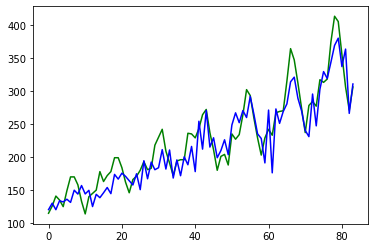

In [24]:
plt.plot(train_true, c='g')
plt.plot(train_pred, c='b')

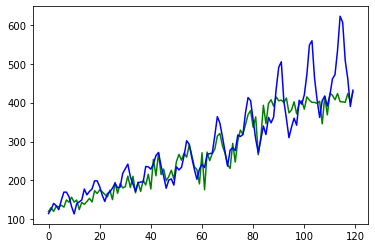

In [25]:
combine_pred = np.concatenate((train_pred, test_pred))
combine_true = np.concatenate((train_true, test_true))

plt.plot(combine_pred, c='g')
plt.plot(combine_true, c='b')